<a href="https://colab.research.google.com/github/AriehAllouche/Project-Pizza-Sales-Kaggle/blob/main/Pizza_Restaurant_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse améliorations de la pizzeria donnée kaggle

**Rappel du contexte** Pour le Maven Pizza Challenge,je joue le rôle d'un consultant BI embauché par Plato's Pizza, une pizzeria d'inspiration grecque du New Jersey. j'ai été embauché pour aider le restaurant à utiliser les données pour améliorer ses opérations, et vous venez de recevoir la note suivante :

Bienvenue à bord, nous sommes ravis que vous soyez là pour vous aider !

Les choses vont bien ici chez Platon, mais il y a place à l'amélioration. Nous avons collecté des données transactionnelles au cours de la dernière année, mais nous n'avons vraiment pas été en mesure de les utiliser à bon escient. En espérant que vous pourrez analyser les données et créer un rapport pour nous aider à trouver des opportunités de générer plus de ventes et de travailler plus efficacement.

Voici quelques questions auxquelles nous aimerions pouvoir répondre :

* Quels jours et heures avons-nous tendance à être les plus occupés ?
* Combien de pizzas faisons-nous pendant les périodes de pointe ?
* Quelles sont nos pizzas les plus et les moins vendues ?
* Quelle est notre valeur moyenne de commande ?
* Dans quelle mesure utilisons-nous notre capacité en sièges ? (nous avons 15 tables et 60 places)
*Quelle est la relation entre le nombre de pizzas vendues et le chiffre d’affaires ? (Cela pourrait aider à comprendre si la vente de certaines pizzas contribue plus au chiffre d’affaires.)
*Quels sont les types de pizzas les plus populaires pendant les différentes périodes de la journée ?( Cela pourrait aider à optimiser le menu pour différentes périodes de la journée.)


C'est tout ce à quoi je peux penser pour l'instant, mais si vous avez d'autres idées, j'aimerais les entendre - vous êtes l'expert !

Merci d'avance,

Mario Maven (gérant, Plato's Pizza)

**This pizza sales dataset make up 12 relevant features:**

* order_id: Unique identifier for each order placed by a table
* order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
* pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price
* quantity: Quantity ordered for each pizza of the same type and size
* order_date: Date the order was placed (entered into the system prior to cooking & serving)
* order_time: Time the order was placed (entered into the system prior to cooking & serving)
* unit_price: Price of the pizza in USD
* total_price: unit_price * quantity
* pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
* pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price
* pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
* pizza_name: Name of the pizza as shown in the menu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')


In [3]:
!pip install -q kaggle


In [4]:
! cp '/content/drive/MyDrive/Kaggle/kaggle.json' ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [5]:
! cp '/content/drive/MyDrive/Kaggle/kaggle.json' ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [6]:
#Donner les droits
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d shilongzhuang/pizza-sales

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [8]:
!unzip /content/drive/MyDrive/Kaggle/Pizza-sales/pizza-sales.zip

unzip:  cannot find or open /content/drive/MyDrive/Kaggle/Pizza-sales/pizza-sales.zip, /content/drive/MyDrive/Kaggle/Pizza-sales/pizza-sales.zip.zip or /content/drive/MyDrive/Kaggle/Pizza-sales/pizza-sales.zip.ZIP.


In [9]:
df=pd.read_excel('/content/drive/MyDrive/Kaggle/Pizza-sales/Data Model - Pizza Sales.xlsx')

In [10]:
#Visualisation rapide
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [11]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


# Mission 1: Nettoyage des données

In [12]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

**Traitement des valeurs manquantes**

In [13]:
df.isnull().any()

order_details_id     False
order_id             False
pizza_id             False
quantity             False
order_date           False
order_time           False
unit_price           False
total_price          False
pizza_size           False
pizza_category       False
pizza_ingredients    False
pizza_name           False
dtype: bool

Aucune valeur manquante

In [14]:
df.sort_values('order_details_id',ascending=False).head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza


In [15]:
df.sort_values('order_details_id',ascending=False).tail()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza


In [16]:
for i in df.columns:
  print(i,df[i].unique())

order_details_id [    1     2     3 ... 48618 48619 48620]
order_id [    1     2     3 ... 21348 21349 21350]
pizza_id ['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' 'soppressata_l'
 'four_cheese_l' 'napolitana_s' 'calabrese_m' 'four_cheese_m'
 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s' 'spinach_fet_l'
 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m' 'southw_ckn_s' 'bbq_ckn_m'
 'pepperoni_m' 'prsc_argla_s' 'sicilian_m' 'veggie_veg_l' 'ckn_alfredo_s'
 'pepperoni_s' 'green_garden_l' 'green_garden_m' 'pep_msh_pep_l'
 'hawaiian_s' 'peppr_salami_m' 'ckn_alfredo_m' 'peppr_salami_l'
 'spin_pesto_s' 'thai_ckn_m' 'classic_dlx_l' 'ckn_pesto_m

Nombre et tailles différentes de pizza

In [17]:
df['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [18]:

num_pizza_choices = df['pizza_name'].nunique()

# Calculer le nombre unique de tailles de pizzas
num_pizza_sizes = df['pizza_size'].nunique()

print(f"Il y a {num_pizza_choices} choix de pizzas et {num_pizza_sizes} tailles de pizzas différentes dans ce restaurant.")


Il y a 32 choix de pizzas et 5 tailles de pizzas différentes dans ce restaurant.


Explorer le minimum et maximum de prix afin de voir si il n'y a pas des données aberrantes

In [19]:
print(df.total_price.min())
print(df.total_price.max())

9.75
83.0


In [20]:
print(df.unit_price.min())
print(df.unit_price.max())

9.75
35.95


In [21]:
df['pizza_ingredients'].unique()

array(['Sliced Ham, Pineapple, Mozzarella Cheese',
       'Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon',
       'Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic',
       'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic',
       'Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic',
       'Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce',
       'Prosciutto di San Daniele, Arugula, Mozzarella Cheese',
       'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce',
       'Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions',
       'Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garlic, Asiago Cheese',
       'Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese',
       'Capocollo, Red Peppers, Tomatoes, Goat Cheese, Garlic, Oregano',
       'Capocollo, Tomatoes, Goat C

On n'observe pas de valeur abberrante

In [22]:
#Création d'un sous ensemble pour connaitre les pizzas la plus chère du restaurant
df1 = df[df['unit_price'] == 35.95]
df1.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
3447,3448,1528,the_greek_xxl,1,2015-01-26,15:24:38,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
3563,3564,1581,the_greek_xxl,1,2015-01-27,16:28:38,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
5901,5902,2614,the_greek_xxl,1,2015-02-13,13:52:26,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
6365,6366,2813,the_greek_xxl,1,2015-02-16,18:15:02,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
7490,7491,3297,the_greek_xxl,1,2015-02-25,12:57:10,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza


In [23]:
#Création d'un sous ensemble pour connaitre les commandes la plus chère du restaurant
df1 = df[df['total_price'] == 83.00]
df1.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
35496,35497,15674,cali_ckn_l,4,2015-09-19,14:16:35,20.75,83.0,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza


Traitement des éventuels doublons

In [24]:
print(df.duplicated().sum())

0


Aucun doublon

Conversion des dates

In [25]:
df['Day_of_week']= df['order_date'].dt.day_name()
df['Day_of_week_no']= df['order_date'].dt.day_of_week
df['Month']= df['order_date'].dt.month_name()
df['Month_no']= df['order_date'].dt.month
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]=df['order_time'].str.split(":",expand=True)

# Mission 2 répondre aux questions:



**Quels mois et heures avons-nous tendance à être les plus occupés ?**

In [26]:
# Regrouper les données par mois et calculer la somme des quantités
month = df.groupby(['Month', 'Month_no'])['quantity'].sum().reset_index().sort_values(['Month_no'])

# Créer une figure
fig = go.Figure()

# Ajouter une trace de ligne
fig.add_trace(go.Scatter(x=month["Month"], y=month["quantity"], mode='lines'))

# Mettre à jour le layout pour avoir un fond blanc
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

# Ajouter des titres
fig.update_layout(title='Quantité de pizzas vendues par mois',
                   xaxis_title='Mois',
                   yaxis_title='Quantité de pizzas vendues')

# Afficher le graphique
fig.show()


**Quels jours et heures avons-nous tendance à être les plus occupés ?**

In [27]:
week= df.groupby(['Day_of_week', 'Day_of_week_no'])['quantity'].sum().reset_index().sort_values(['Day_of_week_no'])
fig = px.line(week, x="Day_of_week", y="quantity")

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

On observe que le jour ou il y a le plus de client est le vendredi

In [28]:
# Grouper par heure et calculer la somme de la quantité de pizzas vendues
hr = df.groupby('Hour')['quantity'].sum().reset_index()

In [29]:

# Créer une figure
fig = go.Figure()

# Ajouter une trace de ligne
fig.add_trace(go.Scatter(x=hr["Hour"], y=hr["quantity"], mode='lines'))

# Mettre à jour le layout pour avoir un fond blanc
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

# Ajouter des titres
fig.update_layout(title='Quantité de pizzas vendues par heure',
                   xaxis_title='Heure',
                   yaxis_title='Quantité de pizzas vendues')

# Afficher le graphique
fig.show()

In [30]:
# Regrouper les données par heure et calculer la somme des quantités
hourly_sales = df.groupby('Hour')['quantity'].sum().reset_index()

# Trouver l'heure avec la quantité maximale de pizzas vendues
peak_hour = hourly_sales[hourly_sales['quantity'] == hourly_sales['quantity'].max()]['Hour']

print(f"La période de pointe pour la vente de pizzas est à {peak_hour.values[0]} heure.")


La période de pointe pour la vente de pizzas est à 12 heure.


On observe que a midi la quantité de pizza est la plus importante

**Combien de pizzas faisons-nous pendant les périodes de pointe ?**

La période de pointe est le midi je veux connaitre la quantité de pizza a midi

In [31]:
# Regrouper les données par heure et calculer la somme des quantités
hourly_sales = df.groupby('Hour')['quantity'].sum().reset_index()

# Trouver l'heure avec la quantité maximale de pizzas vendues
peak_hour = hourly_sales[hourly_sales['quantity'] == hourly_sales['quantity'].max()]

print(f"La période de pointe pour la vente de pizzas est à {peak_hour['Hour'].values[0]} heure, avec {peak_hour['quantity'].values[0]} pizzas vendues.")


La période de pointe pour la vente de pizzas est à 12 heure, avec 6776 pizzas vendues.


In [32]:
# Calculer la quantité totale de pizzas vendues
total_pizzas = df['quantity'].sum()

# Calculer le pourcentage de pizzas vendues pendant l'heure de pointe
peak_hour_pizzas = peak_hour['quantity'].values[0]
percentage = round((peak_hour_pizzas / total_pizzas) * 100, 2)

print(f"Le pourcentage de pizzas vendues pendant l'heure de pointe par rapport à la quantité totale est de {percentage} %.")


Le pourcentage de pizzas vendues pendant l'heure de pointe par rapport à la quantité totale est de 13.67 %.


**Quelles sont nos pizzas les plus et les moins vendues ?**


 On va regarder le nombre de pizza vendu en fonction de leurs noms

In [33]:
# Regrouper les données par nom de pizza et calculer la somme des quantités
pizza_sales = df.groupby('pizza_name')['quantity'].sum().reset_index()

# Trouver la pizza la plus vendue
most_sold_pizza = pizza_sales[pizza_sales['quantity'] == pizza_sales['quantity'].max()]['pizza_name']

# Trouver la pizza la moins vendue
least_sold_pizza = pizza_sales[pizza_sales['quantity'] == pizza_sales['quantity'].min()]['pizza_name']

print(f"La pizza la plus vendue est {most_sold_pizza.values[0]} avec {pizza_sales['quantity'].max()} pizzas vendues.")
print(f"La pizza la moins vendue est {least_sold_pizza.values[0]} avec {pizza_sales['quantity'].min()} pizzas vendues.")


La pizza la plus vendue est The Classic Deluxe Pizza avec 2453 pizzas vendues.
La pizza la moins vendue est The Brie Carre Pizza avec 490 pizzas vendues.


On va regarder le nombre de pizza vendu en fonction de leurs noms et de leur taille

In [34]:
# Regrouper les données par nom et taille de pizza et calculer la somme des quantités
pizza_sales = df.groupby(['pizza_name', 'pizza_size'])['quantity'].sum().reset_index()

# Trouver la pizza la plus vendue
most_sold_pizza = pizza_sales[pizza_sales['quantity'] == pizza_sales['quantity'].max()]

# Trouver la pizza la moins vendue
least_sold_pizza = pizza_sales[pizza_sales['quantity'] == pizza_sales['quantity'].min()]

print(f"La pizza la plus vendue est {most_sold_pizza['pizza_name'].values[0]} de taille {most_sold_pizza['pizza_size'].values[0]} avec {most_sold_pizza['quantity'].values[0]} pizzas vendues.")
print(f"La pizza la moins vendue est {least_sold_pizza['pizza_name'].values[0]} de taille {least_sold_pizza['pizza_size'].values[0]} avec {least_sold_pizza['quantity'].values[0]} pizzas vendues.")


La pizza la plus vendue est The Big Meat Pizza de taille S avec 1914 pizzas vendues.
La pizza la moins vendue est The Greek Pizza de taille XXL avec 28 pizzas vendues.


Je cherche à analyser les revenus générés par les différentes tailles et types de pizzas dans votre restaurant. Il calcule le revenu total pour chaque taille et type de pizza, puis identifie ceux qui génèrent le plus et le moins de revenus. De plus, il examine chaque combinaison unique de taille et de type pour déterminer celles qui sont les plus et les moins rentables. Cette analyse peut vous aider à comprendre quelles pizzas contribuent le plus à votre chiffre d’affaires et où des améliorations pourraient être apportées.

In [35]:
# Calculer le revenu total pour chaque taille de pizza
size_revenue = df.groupby('pizza_size')['total_price'].sum().reset_index()

# Trouver la taille de pizza qui génère le plus de revenus
max_size_revenue = size_revenue[size_revenue['total_price'] == size_revenue['total_price'].max()]

# Trouver la taille de pizza qui génère le moins de revenus
min_size_revenue = size_revenue[size_revenue['total_price'] == size_revenue['total_price'].min()]

print(f"La taille de pizza qui génère le plus de revenus est {max_size_revenue['pizza_size'].values[0]} avec un revenu total de {max_size_revenue['total_price'].values[0]} USD.")
print(f"La taille de pizza qui génère le moins de revenus est {min_size_revenue['pizza_size'].values[0]} avec un revenu total de {min_size_revenue['total_price'].values[0]} USD.")

# Calculer le revenu total pour chaque type de pizza
type_revenue = df.groupby('pizza_name')['total_price'].sum().reset_index()

# Trouver le type de pizza qui génère le plus de revenus
max_type_revenue = type_revenue[type_revenue['total_price'] == type_revenue['total_price'].max()]

# Trouver le type de pizza qui génère le moins de revenus
min_type_revenue = type_revenue[type_revenue['total_price'] == type_revenue['total_price'].min()]

print(f"Le type de pizza qui génère le plus de revenus est {max_type_revenue['pizza_name'].values[0]} avec un revenu total de {max_type_revenue['total_price'].values[0]} USD.")
print(f"Le type de pizza qui génère le moins de revenus est {min_type_revenue['pizza_name'].values[0]} avec un revenu total de {min_type_revenue['total_price'].values[0]} USD.")

# Calculer le revenu total pour chaque combinaison de taille et de type de pizza
combo_revenue = df.groupby(['pizza_name', 'pizza_size'])['total_price'].sum().reset_index()

# Trouver la combinaison de taille et de type de pizza qui génère le plus de revenus
max_combo_revenue = combo_revenue[combo_revenue['total_price'] == combo_revenue['total_price'].max()]

# Trouver la combinaison de taille et de type de pizza qui génère le moins de revenus
min_combo_revenue = combo_revenue[combo_revenue['total_price'] == combo_revenue['total_price'].min()]

print(f"La combinaison de taille et de type de pizza qui génère le plus de revenus est {max_combo_revenue['pizza_name'].values[0]} (taille {max_combo_revenue['pizza_size'].values[0]}) avec un revenu total de {max_combo_revenue['total_price'].values[0]} USD.")
print(f"La combinaison de taille et de type de pizza qui génère le moins de revenus est {min_combo_revenue['pizza_name'].values[0]} (taille {min_combo_revenue['pizza_size'].values[0]}) avec un revenu total de {min_combo_revenue['total_price'].values[0]} USD.")


La taille de pizza qui génère le plus de revenus est L avec un revenu total de 375318.7 USD.
La taille de pizza qui génère le moins de revenus est XXL avec un revenu total de 1006.6000000000001 USD.
Le type de pizza qui génère le plus de revenus est The Thai Chicken Pizza avec un revenu total de 43434.25 USD.
Le type de pizza qui génère le moins de revenus est The Brie Carre Pizza avec un revenu total de 11588.5 USD.
La combinaison de taille et de type de pizza qui génère le plus de revenus est The Thai Chicken Pizza (taille L) avec un revenu total de 29257.5 USD.
La combinaison de taille et de type de pizza qui génère le moins de revenus est The Greek Pizza (taille XXL) avec un revenu total de 1006.6000000000001 USD.


**Quelle est notre valeur moyenne de commande ?**
On va calculer le prix moyen d'une commande

In [36]:
valeur_moy_commande=df['total_price'].mean()
print('valeur moyenne d une commande est de ',valeur_moy_commande)

valeur moyenne d une commande est de  16.821473673385437


**Dans quelle mesure utilisons-nous notre capacité en sièges ? (nous avons 15 tables et 60 places)**

On va regarder par heure la quantité de client en fonction de la quantité des pizza.On va le divisé par 60*100 pour savoir le nombre de place utilisé en pourcentage.
Les limites de ce dataset, nous ne connaisons pas si nous mangeons sur place ou à emporter.

In [37]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'Day_of_week',
       'Day_of_week_no', 'Month', 'Month_no', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [38]:
df5= df.groupby(['Hour'])['quantity'].sum().reset_index()
df5=df5.set_index('Hour')
df5

,quantity
Hour,
09,4
10,18
11,2728
12,6776
13,6413
14,3613
15,3216
16,4239
17,5211


In [39]:
for i in df5.index:
  a=df5['quantity']/60*100
print(a,)


Hour
09        6.666667
10       30.000000
11     4546.666667
12    11293.333333
13    10688.333333
14     6021.666667
15     5360.000000
16     7065.000000
17     8685.000000
18     9028.333333
19     7343.333333
20     5890.000000
21     4241.666667
22     2310.000000
23      113.333333
Name: quantity, dtype: float64


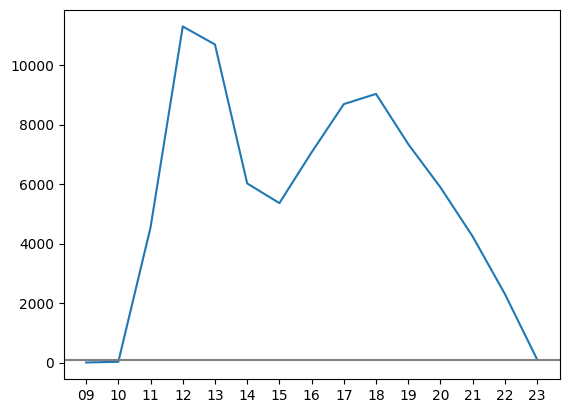

In [40]:
plt.plot(a)
plt.axhline(y=100,color='gray')


On voit que le restaurant est souvent plein sauf à 9h ,10h et 23h

Dans notre analyse, nous avons utilisé les données de vente de pizzas pour estimer l’utilisation des sièges dans votre restaurant. Nous avons fait plusieurs hypothèses pour réaliser cette estimation :

Nous avons supposé qu’une pizza de taille S , M et L équivaut à une personne assise et qu’une pizza de taille  XL,XXL équivaut à deux personnes assises. Cela nous a permis d’estimer le nombre de sièges occupés pour chaque commande en fonction de la taille et de la quantité de pizzas commandées.

Nous avons ensuite regroupé ces estimations par mois, jour et heure pour obtenir une vue détaillée de l’utilisation des sièges dans votre restaurant. Cela nous a permis d’identifier les périodes où votre restaurant est le plus occupé.

Enfin, nous avons calculé le pourcentage d’utilisation des sièges en divisant le nombre total de sièges occupés par la capacité totale du restaurant (60*15=900 sièges).

In [41]:
# Définir une fonction pour estimer le nombre de sièges occupés en fonction de la taille de la pizza
def estimate_seats(row):
    if row['pizza_size'] == ['XXL','XL']:
        return 2 * row['quantity']
    elif row['pizza_size'] in ['S', 'M','L']:
        return row['quantity']
    else:
        return 0

# Appliquer la fonction à chaque ligne du DataFrame pour estimer le nombre de sièges occupés
df['estimated_seats'] = df.apply(estimate_seats, axis=1)

# Calculer le nombre total de sièges occupés
total_seats = df['estimated_seats'].sum()

# Calculer le pourcentage d'utilisation des sièges
percentage = (total_seats / (15 * 60)) * 100

print(f"Le pourcentage estimé d'utilisation des sièges est de {round(percentage, 2)}%.")


Le pourcentage estimé d'utilisation des sièges est de 5443.78%.


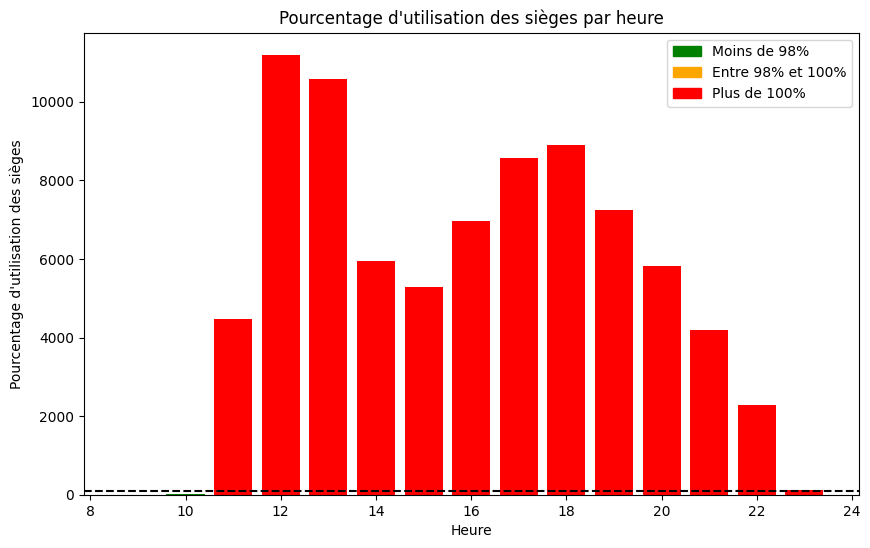

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Convertir la colonne 'order_time' en datetime
df['order_time'] = pd.to_datetime(df['order_time'])

# Extraire l'heure de la colonne 'order_time'
df['Hour'] = df['order_time'].dt.hour

# Estimer le nombre de sièges occupés
df['estimated_seats'] = df.apply(estimate_seats, axis=1)

# Grouper par heure et calculer la somme des sièges estimés
hr = df.groupby('Hour')['estimated_seats'].sum().reset_index()

# Calculer le pourcentage d'utilisation des sièges pour chaque heure
hr['percentage'] = (hr['estimated_seats'] / 60) * 100

# Créer une figure pour le pourcentage d'utilisation des sièges
plt.figure(figsize=(10, 6))

# Définir les couleurs en fonction du pourcentage d'utilisation des sièges
colors = np.where(hr['percentage'] < 98, 'g', np.where(hr['percentage'] <= 100, 'orange', 'r'))

# Tracer un graphique à barres avec les couleurs définies
plt.bar(hr['Hour'], hr['percentage'], color=colors)

# Ajouter une ligne horizontale à 100%
plt.axhline(100, color='black', linestyle='--')

# Ajouter des titres et des étiquettes d'axe
plt.xlabel('Heure')
plt.ylabel('Pourcentage d\'utilisation des sièges')
plt.title('Pourcentage d\'utilisation des sièges par heure')

# Créer une légende pour les couleurs
import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='Moins de 98%')
orange_patch = mpatches.Patch(color='orange', label='Entre 98% et 100%')
red_patch = mpatches.Patch(color='red', label='Plus de 100%')
plt.legend(handles=[green_patch, orange_patch, red_patch])

# Afficher le graphique
plt.show()


In [43]:
hr.head()

,Hour,estimated_seats,percentage
0,9,3,5.000000
1,10,18,30.000000
2,11,2688,4480.000000
3,12,6718,11196.666667
4,13,6342,10570.000000


In [44]:
# Calculer le nombre de sièges en trop ou manquants pour chaque heure
hr['seats_difference'] = hr['estimated_seats'] - 900

# Afficher le nombre de sièges en trop ou manquants pour chaque heure
for index, row in hr.iterrows():
    hour = row['Hour']
    seats_difference = row['seats_difference']
    percentage = row['percentage']

    if seats_difference > 0:
        print(f"\033[92m À {hour} heure, il manque {seats_difference} sièges en trop ({percentage}% d'utilisation des sièges).")
    elif seats_difference < 0:
        print(f"\033[91m À {hour} heure, il y a  {-seats_difference} sièges en trop ({percentage}% d'utilisation des sièges).")
    else:
        print(f"À {hour} heure, il n'y a ni sièges en trop ni sièges manquants ({percentage}% d'utilisation des sièges).")


 À 9.0 heure, il y a  897.0 sièges en trop (5.0% d'utilisation des sièges).
 À 10.0 heure, il y a  882.0 sièges en trop (30.0% d'utilisation des sièges).
 À 11.0 heure, il manque 1788.0 sièges en trop (4480.0% d'utilisation des sièges).
 À 12.0 heure, il manque 5818.0 sièges en trop (11196.666666666666% d'utilisation des sièges).
 À 13.0 heure, il manque 5442.0 sièges en trop (10570.0% d'utilisation des sièges).
 À 14.0 heure, il manque 2675.0 sièges en trop (5958.333333333334% d'utilisation des sièges).
 À 15.0 heure, il manque 2277.0 sièges en trop (5295.0% d'utilisation des sièges).
 À 16.0 heure, il manque 3284.0 sièges en trop (6973.333333333333% d'utilisation des sièges).
 À 17.0 heure, il manque 4240.0 sièges en trop (8566.666666666668% d'utilisation des sièges).
 À 18.0 heure, il manque 4447.0 sièges en trop (8911.666666666666% d'utilisation des sièges).
 À 19.0 heure, il manque 3454.0 sièges en trop (7256.666666666666% d'utilisation des sièges).
 À 20.0 heure, il manque 2599.0

In [45]:
df['Day_of_week'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [46]:
# Grouper par jour de la semaine et calculer la somme des sièges estimés
daily = df.groupby('Day_of_week')['estimated_seats'].sum().reset_index()

# Calculer le pourcentage d'utilisation des sièges pour chaque jour de la semaine
daily['percentage'] = (daily['estimated_seats'] / (12 * 900)) * 100

# Calculer le nombre de sièges en trop ou manquants pour chaque jour de la semaine
daily['seats_difference'] =  (12 * 900)- daily['estimated_seats']

# Créer un dictionnaire qui mappe les noms des jours de la semaine à leurs indices
day_of_week_to_index = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

# Afficher le nombre de sièges en trop ou manquants pour chaque jour de la semaine
for index, row in daily.iterrows():
    day_of_week = row['Day_of_week']
    seats_difference = row['seats_difference']
    percentage = round(row['percentage'], 2)

    if seats_difference > 0:
        print(f"\033[92m Le {day_of_week}, il y a {seats_difference} sièges en trop  ({percentage}% d'utilisation des sièges).")
    elif seats_difference < 0:
        print(f"\033[91m Le {day_of_week}, il manque {seats_difference} sièges ({percentage}% d'utilisation des sièges).")
    else:
        print(f"Le {day_of_week}, il n'y a ni sièges en trop ni sièges manquants ({percentage}% d'utilisation des sièges).")




 Le Friday, il y a 2656 sièges en trop  (75.41% d'utilisation des sièges).
 Le Monday, il y a 4385 sièges en trop  (59.4% d'utilisation des sièges).
 Le Saturday, il y a 3414 sièges en trop  (68.39% d'utilisation des sièges).
 Le Sunday, il y a 4818 sièges en trop  (55.39% d'utilisation des sièges).
 Le Thursday, il y a 3399 sièges en trop  (68.53% d'utilisation des sièges).
 Le Tuesday, il y a 3991 sièges en trop  (63.05% d'utilisation des sièges).
 Le Wednesday, il y a 3943 sièges en trop  (63.49% d'utilisation des sièges).


In [47]:
daily['seats_difference']

0    2656
1    4385
2    3414
3    4818
4    3399
5    3991
6    3943
Name: seats_difference, dtype: int64

In [48]:
# Regrouper les données par mois, jour et heure et calculer la somme des sièges estimés
seats_usage = df.groupby(['Month', 'Day_of_week', 'Hour'])['estimated_seats'].sum().reset_index()

# Trouver le mois, le jour et l'heure avec le plus grand nombre de sièges occupés
peak_usage = seats_usage[seats_usage['estimated_seats'] == seats_usage['estimated_seats'].max()]

print(f"Le restaurant est le plus plein en {peak_usage['Month'].values[0]}, {peak_usage['Day_of_week'].values[0]} à {peak_usage['Hour'].values[0]} heure, avec {peak_usage['estimated_seats'].values[0]} sièges occupés.")

# Calculer le pourcentage d'utilisation des sièges pendant cette période
percentage = (peak_usage['estimated_seats'].values[0] / (15 * 60)) * 100

print(f"Le pourcentage d'utilisation des sièges pendant cette période est de {round(percentage, 2)}%.")


Le restaurant est le plus plein en November, Monday à 12 heure, avec 155 sièges occupés.
Le pourcentage d'utilisation des sièges pendant cette période est de 17.22%.


In [49]:
peak_usage = pd.DataFrame()

# Parcourir chaque combinaison unique de mois, jour et heure
for month in df['Month'].unique():
    for day in df['Day_of_week'].unique():
        for hour in df['Hour'].unique():
            # Filtrer les données pour le mois, le jour et l'heure spécifiques
            data = df[(df['Month'] == month) & (df['Day_of_week'] == day) & (df['Hour'] == hour)]

            # Calculer le nombre total de sièges occupés
            total_seats = data['estimated_seats'].sum()

            # Si le nombre total de sièges occupés dépasse la capacité du restaurant, ajouter les détails à peak_usage
            if total_seats > 60:
                peak_usage = peak_usage.append({'Month': month, 'Day': day, 'Hour': hour, 'Seats': total_seats}, ignore_index=True)

# Afficher les résultats
print(peak_usage)


        Month        Day  Hour  Seats
0     January   Thursday    12    124
1     January   Thursday    13    137
2     January   Thursday    17     82
3     January   Thursday    18     70
4     January     Friday    12     95
..        ...        ...   ...    ...
279  December  Wednesday    12     90
280  December  Wednesday    13    111
281  December  Wednesday    15     63
282  December  Wednesday    17     63
283  December  Wednesday    18     72

[284 rows x 4 columns]


In [50]:

# Regrouper les données par mois et calculer la somme des sièges estimés
monthly_usage = peak_usage.groupby('Month')['Seats'].sum().reset_index()

# Créer un graphique à barres pour l'utilisation des sièges par mois
fig = px.bar(monthly_usage, x='Month', y='Seats', title='Utilisation des sièges par mois')

# Modifier le fond pour qu'il soit blanc
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()




In [51]:
# Regrouper les données par jour et calculer la somme des sièges estimés
daily_usage = peak_usage.groupby('Day')['Seats'].sum().reset_index()

# Créer un graphique à barres pour l'utilisation des sièges par jour
fig = px.bar(daily_usage, x='Day', y='Seats', title='Utilisation des sièges par jour de la semaine')
# Modifier le fond pour qu'il soit blanc
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()


In [52]:
# Regrouper les données par heure et calculer la somme des sièges estimés
hourly_usage = peak_usage.groupby('Hour')['Seats'].sum().reset_index()

# Créer un graphique à barres pour l'utilisation des sièges par heure
fig = px.bar(hourly_usage, x='Hour', y='Seats', title='Utilisation des sièges par heure')
# Modifier le fond pour qu'il soit blanc
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

Les trois pizzas les plus commandées en fonctions de la période

In [53]:
top_pizzas = df.groupby('pizza_name')['quantity'].sum().nlargest(3).index

# Filtrer les données pour ne conserver que ces trois pizzas
filtered_sales = df[df['pizza_name'].isin(top_pizzas)]

# Ajouter la colonne 'Month'
filtered_sales['Month'] = filtered_sales['order_date'].dt.month_name()





# Créer les graphiques pour les données filtrées
fig = px.bar(filtered_sales, x='Month', y='quantity', color='pizza_name', title='Ventes des trois pizzas les plus commandées par mois')
# Modifier le fond pour qu'il soit blanc
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

fig = px.bar(filtered_sales, x='Day_of_week', y='quantity', color='pizza_name', title='Ventes des trois pizzas les plus commandées par jour')
# Modifier le fond pour qu'il soit blanc
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

fig = px.bar(filtered_sales, x='Hour', y='quantity', color='pizza_name', title='Ventes des trois pizzas les plus commandées par heure')
# Modifier le fond pour qu'il soit blanc
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()



In [54]:

from collections import Counter


ingredients = df['pizza_ingredients']

# Créer une liste pour stocker tous les ingrédients
all_ingredients = []

# Parcourir chaque ligne d'ingrédients
for row in ingredients:
    # Diviser la chaîne en une liste d'ingrédients
    row_ingredients = row.split(', ')

    # Ajouter chaque ingrédient à la liste de tous les ingrédients
    all_ingredients.extend(row_ingredients)

# Utiliser Counter pour compter le nombre d'occurrences de chaque ingrédient
ingredient_counts = Counter(all_ingredients)

# Afficher les 5 ingrédients les plus courants
most_common_ingredients = ingredient_counts.most_common(5)
print(most_common_ingredients)


[('Garlic', 27422), ('Tomatoes', 26601), ('Red Onions', 19547), ('Red Peppers', 16284), ('Mozzarella Cheese', 10333)]


In [55]:
df.columns


Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'Day_of_week',
       'Day_of_week_no', 'Month', 'Month_no', 'Hour', 'Minute', 'Second',
       'estimated_seats'],
      dtype='object')

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

# Filtrer les données pour ne garder que les pizzas de taille L
df_L = df[df['pizza_size'] == 'L']

# Créer une nouvelle colonne 'Ingredients_List' qui est une liste des ingrédients de chaque pizza
df_L['Ingredients_List'] = df_L['pizza_ingredients'].apply(lambda x: x.split(', '))

# Utiliser MultiLabelBinarizer pour créer une colonne pour chaque ingrédient
mlb = MultiLabelBinarizer()
ingredient_data = pd.DataFrame(mlb.fit_transform(df_L['Ingredients_List']), columns=mlb.classes_, index=df_L.index)

# Concaténer les données d'ingrédients avec les données originales
df_L = pd.concat([df_L, ingredient_data], axis=1)

# Calculer la corrélation entre le prix et chaque ingrédient
correlations = df_L[mlb.classes_].apply(lambda x: x.corr(df_L['unit_price']))

# Afficher les corrélations
print(correlations)


Alfredo Sauce                 0.062892
Anchovies                     0.080721
Artichoke                     0.140325
Artichokes                    0.213939
Arugula                       0.095204
Asiago Cheese                 0.160004
Bacon                         0.074051
Barbecue Sauce                0.146159
Barbecued Chicken             0.146159
Beef Chuck Roast              0.054164
Blue Cheese                  -0.240916
Calabrese Salami              0.126592
Capocollo                     0.268817
Chicken                       0.318057
Chipotle Sauce                0.156532
Cilantro                      0.156532
Coarse Sicilian Salami        0.053627
Corn                          0.156532
Eggplant                      0.080129
Feta Cheese                   0.085045
Fontina Cheese                0.170813
Friggitello Peppers           0.036039
Garlic                        0.206981
Genoa Salami                  0.121576
Goat Cheese                   0.183105
Gorgonzola Piccante Chees

sans prendre en compte la taille L

# Conclusion

Ce restaurant propose 32 choix de pizzas de 5 tailles de pizzas différentes. IL est ouvert de 9h à 23h tous les jours de la semaine et tous les mois de l'année.Voici une conclusion basée sur l'analyse des données que vous avez fournies :

Les prix des pizzas varient de 9,75 à 35,95 USD et le prix des commandes varie de 9,75 à 83 USD. La valeur moyenne d'une commande est de 16,82 USD.

En ce qui concerne les ventes, il y a un pic notable de pizzas vendues en juillet, suivi de très faibles ventes en septembre, octobre et novembre. Le vendredi est le jour où le restaurant a le plus de clients et le midi est le moment où il y a le plus de clients. Pendant la période de pointe du midi, 6776 pizzas ont été vendues, soit environ 14% des pizzas vendues.

La pizza la plus vendue est "The Classic Deluxe Pizza" avec 2453 pizzas vendues et la moins vendue est "The Brie Carre Pizza" avec 490 pizzas vendues. La pizza la plus vendue est "The Big Meat Pizza" de taille S avec 1914 pizzas vendues et la moins vendue est "The Greek Pizza" de taille XXL avec seulement 28 pizzas vendues.

En termes de revenus, la taille de pizza qui génère le plus de revenus est L avec un revenu total de 375318,7 USD et la moins rentable est XXL avec un revenu total de seulement 1006,60 USD. Le type de pizza qui génère le plus de revenus est "The Thai Chicken Pizza" avec un revenu total de 43434,25 USD et le moins rentable est "The Brie Carre Pizza" avec un revenu total de 11588,5 USD.

La combinaison de taille et de type de pizza qui génère le plus de revenus est "The Thai Chicken Pizza" (taille L) avec un revenu total de 29257,5 USD. La combinaison qui génère le moins de revenus est "The Greek Pizza" (taille XXL) avec un revenu total de seulement 1006,60 USD.

En ce qui concerne l'utilisation des sièges dans votre restaurant, nous avons estimé que le pourcentage d'utilisation des sièges était de 5443,78%. Le restaurant est le plus plein en novembre, le lundi à midi, avec 155 sièges occupés. Le pourcentage d'utilisation des sièges pendant cette période est de 17,22%.

En complément de l'analyse précédente, voici d'autres observations intéressantes :

- Le mois de mars est le mois où l'on utilise le plus de sièges avec un total de 2387 sièges utilisés.
- Le vendredi est le jour où l'on utilise le plus de sièges avec un total de 4554 sièges utilisés.
- L'heure de pointe pour l'utilisation des sièges est à midi avec un total de 5909 sièges utilisés.

En ce qui concerne les pizzas les plus vendues par mois, jour et heure, voici les trois principales :

1. The Barbecue Chicken Pizza
2. The Hawaiian Pizza
3. The Classic Deluxe Pizza




Suite à une analyse approfondie des données de vente de notre restaurant, voici quelques observations clés qui pourraient nous aider à améliorer nos opérations et notre rentabilité :

1. **Ventes de pizzas** : Nous avons observé un pic notable de ventes de pizzas en juillet, suivi de très faibles ventes en septembre, octobre et novembre. Cela pourrait indiquer une opportunité d'augmenter nos efforts de marketing pendant ces mois plus lents pour stimuler les ventes.

2. **Jours et heures de pointe** : Le vendredi est le jour où nous avons le plus de clients et le midi est le moment où nous avons le plus de clients. Pendant cette période de pointe, nous vendons environ 14% de nos pizzas. Cela pourrait nous aider à planifier notre personnel et nos ressources de manière plus efficace.

3. **Pizzas les plus populaires** : Nos pizzas les plus vendues sont "The Classic Deluxe Pizza", "The Barbecue Chicken Pizza" et "The Hawaiian Pizza". Nous pourrions envisager de mettre en avant ces pizzas dans nos menus et nos promotions.

4. **Utilisation des sièges** : Nous avons estimé que l'utilisation des sièges était la plus élevée en mars, avec un total de 2387 sièges utilisés. Le vendredi est le jour où nous utilisons le plus de sièges et l'heure de pointe pour l'utilisation des sièges est à midi. Ces informations pourraient nous aider à gérer efficacement notre capacité d'accueil.

Ces observations sont basées sur plusieurs hypothèses, notamment que chaque pizza vendue équivaut à un siège occupé (deux pour les tailles XL et XXL) et que notre restaurant a une capacité totale de 60 sièges. Bien que ces hypothèses puissent ne pas être parfaitement précises, elles nous donnent une bonne estimation de l'utilisation des sièges dans notre restaurant.

En se basant sur ces informations, je recommanderais d'envisager les actions suivantes :

- Augmenter nos efforts de marketing pendant les mois où les ventes sont faibles.
- Planifier notre personnel en fonction des jours et des heures de pointe.
- Mettre en avant nos pizzas les plus populaires dans nos menus et nos promotions.

Bien sûr, je m'excuse pour l'omission. Voici quelques observations supplémentaires concernant les revenus générés par nos ventes de pizzas :

1. **Revenus par taille de pizza** : La taille de pizza qui génère le plus de revenus est la taille L avec un revenu total de 375318,7 USD. À l'inverse, la taille XXL génère le moins de revenus avec un total de seulement 1006,60 USD. Cela pourrait indiquer que nos clients préfèrent les pizzas de taille moyenne plutôt que les plus grandes.

2. **Revenus par type de pizza** : Le type de pizza qui génère le plus de revenus est "The Thai Chicken Pizza" avec un revenu total de 43434,25 USD. Le moins rentable est "The Brie Carre Pizza" avec un revenu total de 11588,5 USD. Cela pourrait nous aider à décider quelles pizzas promouvoir davantage.

3. **Revenus par combinaison de taille et de type** : La combinaison qui génère le plus de revenus est "The Thai Chicken Pizza" (taille L) avec un revenu total de 29257,5 USD. La combinaison qui génère le moins de revenus est "The Greek Pizza" (taille XXL) avec un revenu total de seulement 1006,60 USD.

Sur la base de ces observations, je recommanderais d'envisager les actions suivantes :

- Promouvoir davantage nos pizzas de taille L, qui semblent être les plus populaires auprès de nos clients.
- Mettre en avant "The Thai Chicken Pizza" dans nos menus et nos promotions, car c'est le type de pizza qui génère le plus de revenus.
- Réévaluer notre offre pour les pizzas XXL et "The Greek Pizza", qui semblent moins populaires et moins rentables.

Nous avons aussi analysé le prix des pizzas de taille L en fonctions des ingrédients a l'interieur t nous observons que les tomates ont une corrélation positive élevée de 0,626242 avec le prix, ce qui signifie que les pizzas contenant des tomates ont tendance à être plus chères. À l’inverse, le fromage mozzarella a une corrélation négative élevée de -0,760205 avec le prix, ce qui signifie que les pizzas contenant du fromage mozzarella ont tendance à être moins chères.

J'espère que ces informations supplémentaires vous seront utiles pour prendre des décisions éclairées sur notre menu et nos promotions.
